X_train shape:  (54923, 30) y_train shape:  (54923,) X_test shape:  (13731, 30) y_test shape:  (13731,)
Accuracy score of Random Forest Classifier:  0.9908965115432233
F-1 score of Random Forest Classifier:  0.6958637469586375
Accuracy score of Logistic Regression:  0.9845604835773069
F-1 score of Logistic Regression:  0.29333333333333333


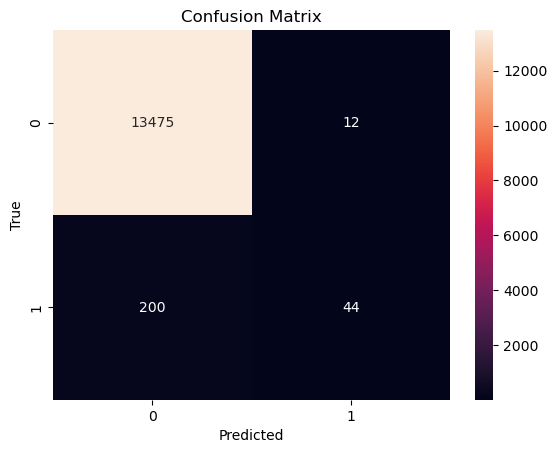

Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13487
           1       0.79      0.18      0.29       244

    accuracy                           0.98     13731
   macro avg       0.89      0.59      0.64     13731
weighted avg       0.98      0.98      0.98     13731

Logistic regression Coef:  [[-1.95168452e-05  2.35267069e-05 -3.42811051e-01 -7.62375770e-03
  -7.22568202e-03  7.00819475e-03 -8.14493554e-05 -4.68533824e-02
  -4.60999313e-02  2.18564205e-06 -4.32065380e-05  4.80853618e-06
  -2.14954411e-05  2.69991203e-04  6.82569016e-06 -1.27198856e-06
  -9.00634720e-06 -2.95730544e-05 -9.63075718e-06 -3.72515355e-06
   1.92808388e-05 -2.32425150e-10 -1.74853983e-10  4.33386792e-05
  -1.10671132e-09 -2.10948771e-04 -8.13399744e-05 -2.29697728e-04
  -5.32988665e-04 -8.44507112e-06]]
Logistic regression Intercept:  [-0.04693483]
P(y=1∣X)= 1/(1+ ((e) ^ (-)(intercept + coefficient_1 * x_1 + coefficient_2 * x

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Load data
df_train = pd.read_csv("Train.csv")

# Extracting the target variable
y = df_train['target']
y=y.values

# Getting rid of unused columns
df_train.drop(columns = ['target', 'ID','customer_id','country_id','tbl_loan_id','lender_id', 'disbursement_date','due_date'], axis=1, inplace=True)

# making dummy variables of train and test data dataframes
dummies_loan_type = pd.get_dummies(df_train['loan_type'])
dummies_repeat_type = pd.get_dummies(df_train['New_versus_Repeat'])

# Concatenating dataframe with dummy variables
df = pd.concat([df_train, dummies_repeat_type, dummies_loan_type], axis=1)

# Getting rid of unused columns
df.drop(columns = ['loan_type', 'New_versus_Repeat'], axis = 1, inplace = True)

# Equating dataframes, extracting the columns
X=df
X=X.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes
print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape, "X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

# Random Forest Classifier
# Fitting the Random Forest classifier model
model_random_forest_classifier = RandomForestClassifier(random_state=1)
model_random_forest_classifier.fit(X_train, y_train)

# Predicting the Random Forest classifier model
y_hat_rfc = model_random_forest_classifier.predict(X_test)

# Evaluation metrics of Random Forest classifier
accuracy_random_forest_classifier = accuracy_score(y_test, y_hat_rfc)
print("Accuracy score of Random Forest Classifier: ", accuracy_random_forest_classifier)
f1_random_forest_classifier = f1_score(y_test, y_hat_rfc)
print("F-1 score of Random Forest Classifier: ", f1_random_forest_classifier)

# Logistic regression
# Fitting the Logistic Regression model
model_logistic_regression = LogisticRegression(random_state=0, max_iter=10000)
model_logistic_regression.fit(X_train, y_train)

# Predicting the Logistic Regression model
y_hat_lr = model_logistic_regression.predict(X_test)

# Evaluation metrics of Logistic Regression
accuracy_logistic_regression = accuracy_score(y_test, y_hat_lr)
print("Accuracy score of Logistic Regression: ", accuracy_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_hat_lr)
print("F-1 score of Logistic Regression: ", f1_logistic_regression)

# Confusion matrix
cm = confusion_matrix(y_test, y_hat_lr)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification report: ")
print(classification_report(y_test, y_hat_lr))

# Get coefficients and intercept of Logistic Regression
coefficients = model_logistic_regression.coef_  # Coefficients for the features
intercept = model_logistic_regression.intercept_  # Intercept term
print("Logistic regression Coef: ", coefficients)
print("Logistic regression Intercept: ", intercept)
print("P(y=1∣X)= 1/(1+ ((e) ^ (-)(intercept + coefficient_1 * x_1 + coefficient_2 * x_2")
